# Set Up Environment

Import libraries

In [74]:
from azureml.core import Workspace
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

Create Microsoft Azure workspace

In [62]:
ws = Workspace.create(None)

# Obtain Data

Read data into pandas and filter df for satisfaction features

In [63]:
df = pd.read_csv('Excel/data.csv')
df = df[['Owner Satisfaction', 'Driving Satisfaction', 'Comfort Satisfaction', 'Value Satisfaction',
        'Styling Satisfaction']]
print(df.shape)
df.head()

(231, 5)


,Owner Satisfaction,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
0,4,NaN,NaN,NaN,NaN
1,5,98.0,82.0,72.0,91.0
2,1,66.0,49.0,58.0,83.0
3,3,77.0,80.0,64.0,86.0
4,4,NaN,NaN,NaN,NaN


# Scrub Data

Perform df.info to understand what scrubbing is needed

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Owner Satisfaction    231 non-null    int64  
 1   Driving Satisfaction  171 non-null    float64
 2   Comfort Satisfaction  171 non-null    float64
 3   Value Satisfaction    171 non-null    float64
 4   Styling Satisfaction  171 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 9.1 KB


Drop rows with missing values

In [65]:
df.dropna(inplace=True)
df.head()

,Owner Satisfaction,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction
1,5,98.0,82.0,72.0,91.0
2,1,66.0,49.0,58.0,83.0
3,3,77.0,80.0,64.0,86.0
5,3,77.0,76.0,60.0,80.0
6,3,83.0,82.0,59.0,88.0


Run Isolation Forest in order to confirm no unreasonable outlier values

In [70]:
features_df = df[['Driving Satisfaction', 'Comfort Satisfaction', 'Value Satisfaction', 'Styling Satisfaction']]
isf = IsolationForest(random_state=53, n_estimators=1000, contamination = .03)
isf_pred = isf.fit_predict(features_df)
isf_pred_df = pd.DataFrame(isf_pred, columns=['Outlier'])
isf_df = pd.merge(features_df, isf_pred_df, left_index=True, right_index=True)
isf_df[isf_df['Outlier']==-1]

,Driving Satisfaction,Comfort Satisfaction,Value Satisfaction,Styling Satisfaction,Outlier
41,80.0,70.0,65.0,78.0,-1
60,85.0,67.0,57.0,87.0,-1
121,96.0,72.0,73.0,95.0,-1
146,58.0,63.0,55.0,80.0,-1
161,81.0,69.0,79.0,93.0,-1


Confirm data is now scrubbed with a df.info()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1 to 230
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Owner Satisfaction    171 non-null    int64  
 1   Driving Satisfaction  171 non-null    float64
 2   Comfort Satisfaction  171 non-null    float64
 3   Value Satisfaction    171 non-null    float64
 4   Styling Satisfaction  171 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 13.0 KB


# Explore Data

Plot frequency distribution of dependent variable overall Owner Satisfaction scores

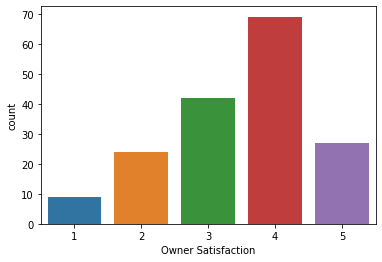

In [97]:
fig, ax = plt.subplots()
sns.countplot(x='Owner Satisfaction', data=df, ax=ax)

Plot frequency distributions of dependent variables

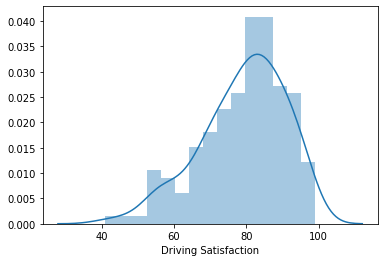

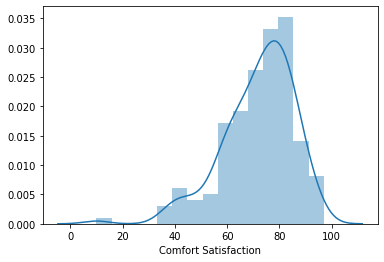

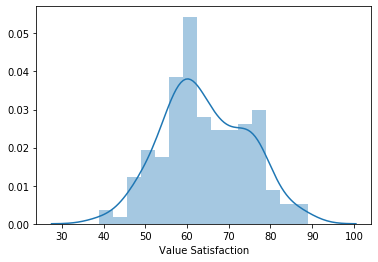

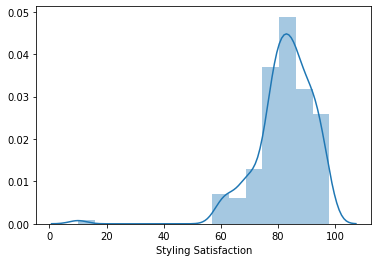

In [100]:
features = list(df.columns)
features.remove('Owner Satisfaction')
for feat in features:
    fig, ax = plt.subplots()
    sns.distplot(df[feat], kde=True, bins=15, ax=ax)

Plot mean feature score by Owner Satisfaction score to test linearity of relationship between features and dependent var

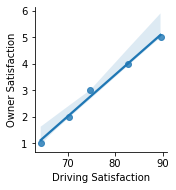

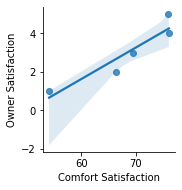

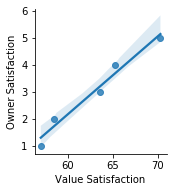

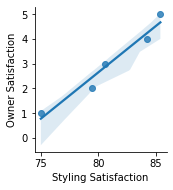

In [95]:
eda_df = df.groupby('Owner Satisfaction').mean()
eda_df.reset_index(inplace=True)
for feat in features:
    sns.pairplot(x_vars=feat, y_vars='Owner Satisfaction', data=eda_df, kind='reg')

Plot heatmap of correlation coefficients between features

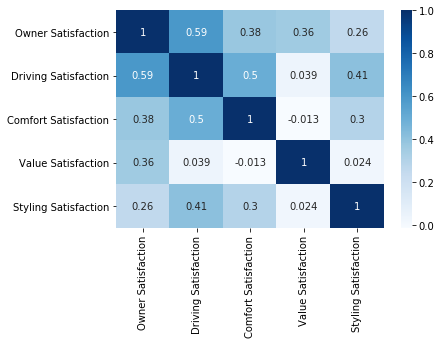

In [105]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=ax)

Model Data